In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import seaborn as sns

In [2]:
df = pd.read_csv('Staphylococcus_aureus_Infection_Data.csv')


In [3]:
df = df.dropna()
df.head()

,Unnamed: 0,AGE_GRP,ThirtyDay_Death,SixWeek_Death,ThreeMo_Death,SixMo_Death,NineMo_Death,OneYear_Death,Charlson_WIC,Protein 1,...,Protein 2084,Protein 2085,Protein 2086,Protein 2087,Protein 2088,Protein 2089,Protein 2090,Protein 2091,Protein 2092,Protein 2093
1,102,51-60,False,False,False,False,False,False,0.0,0.216912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103,51-60,False,False,False,False,False,False,2.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,105,71-80,True,True,True,True,True,True,4.0,0.224415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,108,61-70,False,False,False,False,False,False,5.0,-0.080960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,109,51-60,False,False,False,False,False,False,1.0,0.013984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y = df.iloc[:, 7]
y=y.astype('int')
x = df.iloc[:, df.columns != {'ThirtyDay_Death', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death'}]
x.drop(columns=['ThirtyDay_Death', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death'], inplace=True)
x

,Unnamed: 0,AGE_GRP,Charlson_WIC,Protein 1,Protein 2,Protein 3,Protein 4,Protein 5,Protein 6,Protein 7,...,Protein 2084,Protein 2085,Protein 2086,Protein 2087,Protein 2088,Protein 2089,Protein 2090,Protein 2091,Protein 2092,Protein 2093
1,102,51-60,0.0,0.216912,-0.150886,-0.038081,0.069588,0.336442,-0.104392,0.008110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103,51-60,2.0,0.000000,-0.701414,-0.354478,0.135928,-0.349327,-0.003024,-0.098326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,105,71-80,4.0,0.224415,-0.053709,-0.025547,0.061783,-0.046513,-0.105150,0.096859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,108,61-70,5.0,-0.080960,-0.480949,-0.345807,0.360044,-0.355281,0.213266,-0.156073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,109,51-60,1.0,0.013984,-0.350237,-0.163590,-0.095393,0.161053,-0.008987,-0.123618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,8087,00-10,0.0,0.191297,-0.282302,-0.086869,-0.236988,0.095155,-0.559137,-0.219141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6183,8088,51-60,0.0,-0.091525,-0.369944,-0.280567,-0.105545,1.575638,-0.371383,-0.202128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6184,8089,61-70,9.0,0.131185,-0.507178,-0.341122,-0.210575,0.005521,-0.128864,-0.123932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6185,8090,00-10,0.0,-0.034182,-0.233550,-0.491791,-0.271780,-0.334578,-0.154275,-0.255856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y.iloc[:]


1       0
2       0
3       1
4       0
5       0
       ..
6182    0
6183    0
6184    1
6185    0
6186    1
Name: OneYear_Death, Length: 5547, dtype: int32

In [9]:
z = 0
for i in range(5547):
    if( type(x.iloc[i,1]) != type(float(0))):
        z = x.iloc[i,1][:2]
        x.iloc[i,1] = int(z)
        if(x.iloc[i,1] == 0):
            x.iloc[i,1] = 1
    else:
        x.iloc[i,1] = 1

TypeError: 'int' object is not subscriptable

In [10]:
x=x.astype('int')


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [12]:
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [13]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[586, 193],
       [164, 167]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

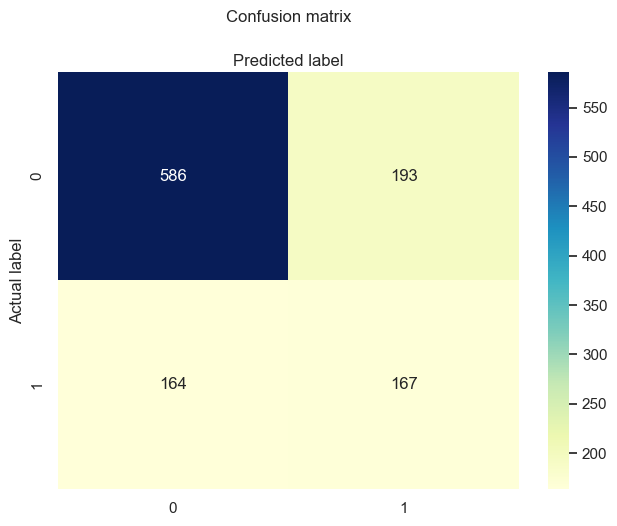

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
target_names = ['doesn\'t die', 'dies']
print(classification_report(y_test, y_pred, target_names=target_names))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

 doesn't die       0.78      0.75      0.77       779
        dies       0.46      0.50      0.48       331

    accuracy                           0.68      1110
   macro avg       0.62      0.63      0.62      1110
weighted avg       0.69      0.68      0.68      1110



0.6783783783783783

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print(f"Testing Accuracy: {accuracy_percent:.2f}%")


Testing Accuracy: 67.84%


In [18]:
train_accuracy = dtc.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0
